In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import  train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn import metrics

In [4]:
df=pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [9]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [12]:
df.replace({'sex':{'male':1,'female':0},'smoker':{'yes':1,'no':0},'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [14]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.455157,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130197,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


<Figure size 500x500 with 0 Axes>

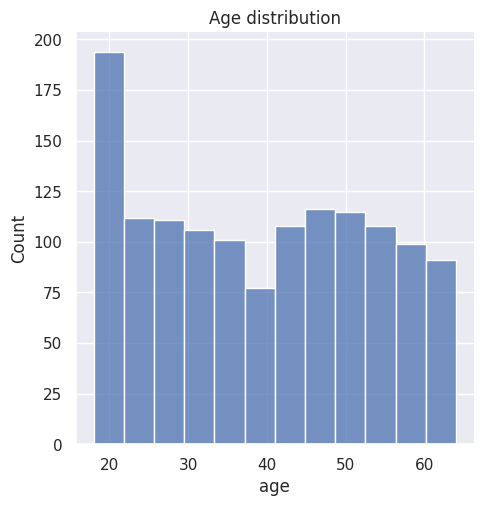

In [17]:
sns.set()
plt.figure(figsize=(5,5))
sns.displot(df['age'])
plt.title('Age distribution')
plt.show()

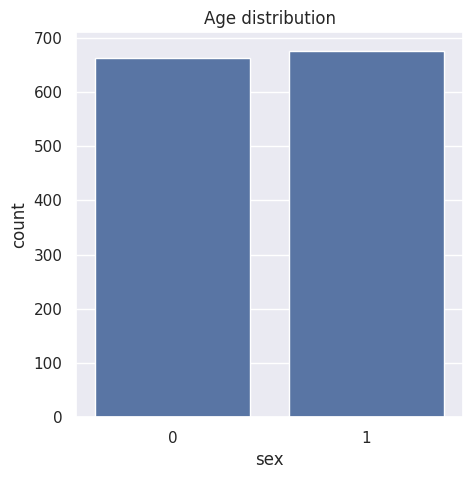

In [19]:
plt.figure(figsize=(5,5))
sns.countplot(x='sex',data=df)
plt.title('Age distribution')
plt.show()

<ipython-input-24-4df338cd941a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


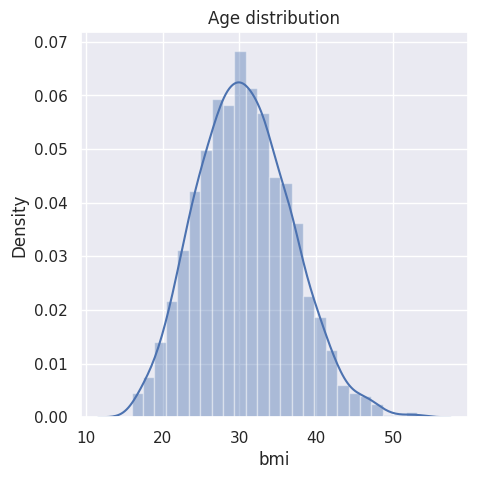

In [24]:
plt.figure(figsize=(5,5))
sns.distplot(df['bmi'])
plt.title('Age distribution')
plt.show()

Seperating data and targets

In [26]:
x=df.drop(columns='charges',axis=1)
y=df['charges']
print(x.shape)
print(y.shape)

(1338, 6)
(1338,)


Seperating Train and test data

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=None,random_state=2)
print(x_train.shape)
print(x_test.shape)

(1204, 6)
(134, 6)


Model Training

In [29]:
model = XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Model Evaluation

In [30]:
training_model_prediction=model.predict(x_train)
print(training_model_prediction)

[ 7199.5083  6075.8203  2757.     ... 12477.455  10565.758  12429.42  ]


In [32]:
score=metrics.r2_score(y_train,training_model_prediction)
print(score)

0.9956307517375618


Model Testing

In [33]:
test_model_prediction=model.predict(x_test)
print(test_model_prediction)

[ 2338.9243   10915.185    13735.576     1132.1416    8246.242
  9015.676     -296.3101    4332.743    23371.703     9159.828
 11479.614     2837.073    18807.27      1148.3679   10146.825
 11498.117     3774.4487    7645.7847   19836.541    18732.559
 11713.535     1557.7284   39559.047    20817.29     37023.87
 10121.738     2666.2866    8037.153     5865.2236    2660.3167
  7118.9917    7158.915     7008.3247    3338.009     9360.899
  7248.7476   36552.79      3938.2769   16943.234    12749.918
   919.56165  35181.727     5050.3315    2069.9485    6957.581
  8122.7783    9644.893     9087.61      6657.537    10595.432
 12674.6875    1359.1707   17165.65     43840.434     7885.718
 13302.299     3056.0847    8176.1553    9389.895    40900.258
 18045.842      841.83203   2854.3337   46746.99      1250.3298
 14413.41     11331.212     5022.5435   14085.299     7690.706
 10904.848    16016.907    10154.5625    6675.477    12857.371
  9582.016     1317.1453    2474.3484     336.38535  1

In [34]:
score=metrics.r2_score(y_test,test_model_prediction)
print(score)

0.7036789315163705


Visualizing our Model

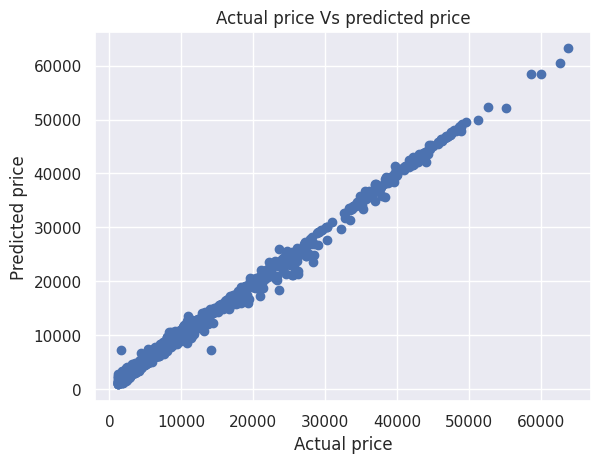

In [35]:
plt.scatter(y_train,training_model_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price Vs predicted price')
plt.show()